In [19]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization

In [ ]:
batch_size = 32
num_classes = 10
epochs = 20
 
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# One hot Encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [56]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [57]:
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


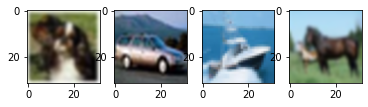

In [44]:
plt.subplot(141)
plt.imshow(x_train[500], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="blackman")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8])#, interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
 
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs,
                 batch_size=batch_size)

Epoch 1/20
1563/1563 [==============================] - 187s 120ms/step - loss: 1.2543 - accuracy: 0.5534 - val_loss: 1.0579 - val_accuracy: 0.6220
Epoch 2/20
1563/1563 [==============================] - 179s 115ms/step - loss: 0.9534 - accuracy: 0.6654 - val_loss: 0.7940 - val_accuracy: 0.7205
Epoch 3/20
1563/1563 [==============================] - 177s 113ms/step - loss: 0.8458 - accuracy: 0.7029 - val_loss: 0.8622 - val_accuracy: 0.6983
Epoch 4/20
1563/1563 [==============================] - 187s 120ms/step - loss: 0.7719 - accuracy: 0.7282 - val_loss: 0.7720 - val_accuracy: 0.7331
Epoch 5/20
1563/1563 [==============================] - 174s 111ms/step - loss: 0.7074 - accuracy: 0.7523 - val_loss: 0.7094 - val_accuracy: 0.7502
Epoch 6/20
1563/1563 [==============================] - 177s 113ms/step - loss: 0.6539 - accuracy: 0.7711 - val_loss: 0.6429 - val_accuracy: 0.7731
Epoch 7/20
1563/1563 [==============================] - 172s 110ms/step - loss: 0.6180 - accuracy: 0.7838 - val_

In [13]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 18.05%


In [63]:
scores[0]

0.5701218247413635

No handles with labels found to put in legend.


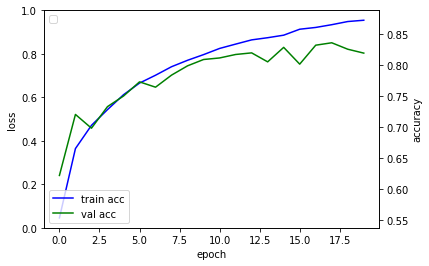

In [18]:
# 모델 시각
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
#loss_ax.plot(hist.history['loss'], 'y', label='train loss')
#loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax. set_ylabel('accuracy')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()


#출처: https://boysboy3.tistory.com/105 [When will you grow up?]

No handles with labels found to put in legend.


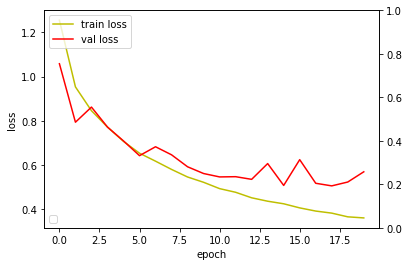

In [65]:
# 모델 시각
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
 
#acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
#acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax. set_ylabel('accuracy')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()
